<a href="https://colab.research.google.com/github/CarolinaPiedrahita/fundamentos_IA/blob/main/Piedrahita_Carolina_Script_Semana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: Completamiento y producción








**Título del Trabajo:** Análisis de Datos de Producción y Completamiento en Python

**Nombre Completo:** Carolina Piedrahita

**Curso:** Fundamentos para IA

**Número de Semana:** Semana 2

**Nombre del Docente:** Roy Diaz Vesga

**Fecha de Entrega:** 26 Mayo 2024


## 0.- Importación de librerías


In [124]:
import pandas as pd  # Manejo de data estructurada (Dataframe)
import numpy as np  # Manejo de matrices
import matplotlib.pyplot as plt  # Gráficas
import seaborn as sns  # Gráficas sencillas
from scipy import stats  # Operaciones estadísticas
from PIL import Image  # Manipulación de imágenes
import cv2  # Lectura de
import folium
from IPython.display import display, IFrame

Funciones que utilizaré para visualizar y resumir variables numéricas y categóricas.

In [125]:
def analisisNumericas(df, variable):
  # fig, ax = plt.subplots(1, 2,figsize=(12, 4))
  # ax[0].hist(df[variable], bins=25)
  # ax[1].boxplot(df[variable],0, 'gD')
  # plt.show()

  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4),color="#CABDE9")
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()

def analisisCategoricas(df, variable):
  frecuencia_absoluta = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(dropna = False))
  frecuencia_absoluta.columns = ['FREC_ABS']
  frecuencia_relativa = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(normalize = True, dropna = False))
  frecuencia_relativa.columns = ['FREC_REL']
  tablaResumen = pd.concat([frecuencia_absoluta,frecuencia_relativa], axis = 1)
  display(tablaResumen)
  tablaResumen
  plt.bar(x = tablaResumen.index, height = tablaResumen['FREC_ABS'], color="#CABDE9")
  for i, txt in enumerate(tablaResumen['FREC_ABS']):
    plt.annotate(str(txt), (i, txt), fontsize = 12)
  plt.twinx()
  plt.plot(tablaResumen['FREC_REL'], linestyle='-', linewidth=2.0, color='red')
  plt.ylim(0, 1)
  for i, txt in enumerate(tablaResumen['FREC_REL']):
    plt.annotate(str(round(txt * 100, 1)) + '%', (i, txt), fontsize = 12, ha='center')
  plt.show()

## 1. Comprensión del negocio

Una empresa operadora de un campo africano desea a través de un estudio responder a las siguientes preguntas:

*   ¿Cuál es el completamiento que dá tasas más altas de producción?
*   ¿Cuál es el completamiento que dá tasas más bajas de producción?
*   ¿Cuál es el completamiento que dá tasas más altas de inyección?
*   ¿Cuál es el completamiento que dá tasas más bajas de inyección?
*   ¿Cuáles son las variables que más afectan la producción?



## 2. Comprensión de los datos & Carga de Dataset

**En esta etapa nos avocaremos a conocer todo lo referente a los datos con los que contamos**

Quise usar este dataset dado que mi profesión de base es ingenieria de petroleos. El dataset hace parte de una base de datos que se me compartieron durante mi pansantía en el laboratorio de geomecanica aplicada de la universidad Nacional.

Las características  son:

*   Qo: Caudal oil
*   Qw: Caudal agua
*   Qg: Caudal de gas
*   Year: Año
*   Month: Mes
*   wellAPI: API del pozo
*   Wellname: Nombre del pozo
*   BHP: Presión de fondo
*   CompL: Completamiento
*   FlowDays: Días de flujo
*   Type: Tipo
*   TD: Profundidad verdadera
*   reservoir: yacimiento
*   long: longitud
*   lat: latitud










### 2.1.- Recopilación de los Datos


In [126]:
# Lectura de la base de datos desde Github en internet y asignación a la variable df.
path = "https://raw.githubusercontent.com/CarolinaPiedrahita/DataScienceOilandGas/main/DatasetCompletamientoProducer.csv"
df = pd.read_csv(path)


In [127]:
# Visualizar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   Year  Month     wellAPI Wellname  BHP        Qo         Qw        Qg  \
0  2005      1  2ECFC837AC  Well025   15  33.30351  363.87170  13.85077   
1  2005      2  2ECFC837AC  Well025   15  27.24609  378.91081  14.23028   
2  2005      3  2ECFC837AC  Well025   15  22.95982  385.97324  13.93621   
3  2005      8  2ECFC837AC  Well025   15  25.33575  395.48484  13.87802   
4  2005      9  2ECFC837AC  Well025   15  25.15923  383.04923  14.12587   

      CompL  FlowDays      Type        TD reservoir       long        lat  
0  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
1  60.69554  28.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
2  60.69554  31.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
3  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
4  60.69554  30.00000  Producer  7509.843    Bisque  21.204409 -33.169318  


In [128]:
df.shape
# INTERPRETACION:
# 3220 observaciones | registros o filas
# 15 columnas

(3220, 15)

In [129]:
df.info() #Acá podemos observar el tipo de dato y la cantidad de registros asociados a cada variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       3220 non-null   int64  
 1   Month      3220 non-null   int64  
 2   wellAPI    3220 non-null   object 
 3   Wellname   3220 non-null   object 
 4   BHP        3220 non-null   int64  
 5   Qo         3220 non-null   float64
 6   Qw         3220 non-null   float64
 7   Qg         3220 non-null   float64
 8   CompL      3220 non-null   float64
 9   FlowDays   3220 non-null   float64
 10  Type       3220 non-null   object 
 11  TD         3220 non-null   float64
 12  reservoir  3220 non-null   object 
 13  long       3220 non-null   float64
 14  lat        3220 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 377.5+ KB


In [130]:
df.head() # Acá podemos visualizar como esta formado nuestro dataset, y ejemplo de los primeros 10 datos que lo conforman.

,Year,Month,wellAPI,Wellname,BHP,Qo,Qw,Qg,CompL,FlowDays,Type,TD,reservoir,long,lat
0,2005,1,2ECFC837AC,Well025,15,33.30351,363.87170,13.85077,60.69554,29.99997,Producer,7509.843,Bisque,21.204409,-33.169318
1,2005,2,2ECFC837AC,Well025,15,27.24609,378.91081,14.23028,60.69554,28.00000,Producer,7509.843,Bisque,21.204409,-33.169318
2,2005,3,2ECFC837AC,Well025,15,22.95982,385.97324,13.93621,60.69554,31.00000,Producer,7509.843,Bisque,21.204409,-33.169318
3,2005,8,2ECFC837AC,Well025,15,25.33575,395.48484,13.87802,60.69554,29.99997,Producer,7509.843,Bisque,21.204409,-33.169318
4,2005,9,2ECFC837AC,Well025,15,25.15923,383.04923,14.12587,60.69554,30.00000,Producer,7509.843,Bisque,21.204409,-33.169318


In [131]:
# Descripción estadística del dataset
print("Descripción estadística del dataset:")
print(df.describe())

Descripción estadística del dataset:
              Year        Month     BHP           Qo           Qw  \
count  3220.000000  3220.000000  3220.0  3220.000000  3220.000000   
mean   2011.286646     6.459317    15.0    31.563597   631.741510   
std       3.760557     3.471701     0.0    20.365526   374.591027   
min    2005.000000     1.000000    15.0     0.582310     7.001600   
25%    2008.000000     3.000000    15.0    19.297650   376.534282   
50%    2011.000000     6.000000    15.0    25.377850   562.762825   
75%    2014.000000    10.000000    15.0    36.573622   809.403585   
max    2018.000000    12.000000    15.0   249.002960  2230.359120   

                Qg        CompL     FlowDays            TD         long  \
count  3220.000000  3220.000000  3220.000000   3220.000000  3220.000000   
mean     14.047146    87.794252    29.587879   7878.237043    21.218957   
std       8.133956    53.194094     2.187269    515.709144     0.015996   
min       0.330820    11.482940     2.000

In [132]:
target = 'Qo' # sera el target dado que se vamos a  modelar con pozos productores

In [133]:
df[target].value_counts() #Se realiza un conteo por tipo de tasa de producción de petróleo


Qo
27.67515    8
25.15923    6
20.75636    5
29.56209    5
22.01432    5
           ..
30.42846    1
29.80963    1
25.37633    1
30.03173    1
18.45551    1
Name: count, Length: 3056, dtype: int64

In [134]:
df['reservoir'].value_counts()
#Se realiza un conteo por tipo de yacimiento


reservoir
Red       1922
Maine      742
Rock       295
Bisque     261
Name: count, dtype: int64

In [135]:
df['CompL'].value_counts() #Se realiza un conteo por completamiento

CompL
68.89764     154
24.60630     141
60.69554     135
187.00788    121
78.74016     115
            ... 
58.07769       1
64.75689       1
95.80735       1
111.16065      1
53.54903       1
Name: count, Length: 70, dtype: int64

### 2.2 Identificación y conteo de valores faltantes:

Voy aplicar el método `isnull()` y a utilizar la función de agregación `sum()` para identificar los valores faltantes por variable.

In [136]:
# Identificaciónde valores faltantes
datos_faltantes = df.isnull().sum()
datos_faltantes

Year         0
Month        0
wellAPI      0
Wellname     0
BHP          0
Qo           0
Qw           0
Qg           0
CompL        0
FlowDays     0
Type         0
TD           0
reservoir    0
long         0
lat          0
dtype: int64

De acuerdo a la información anterior no tenemos datos faltantes para ningún campo.


Por lo cuál, no es necesario hacer tratamiento de datos faltantes, para fines académicos se listan las opciones de tratamiento de datos faltantes:

<ol>
    <li>Eliminar el dato entero<br>
        a. Eliminar la fila entera<br>
        b. Eliminar la columna entera
    </li>
    <li>Reemplazar el dato<br>
        a. Reemplazar por la media<br>
        b. Reemplazar por la moda<br>
        c. Reemplazar basados en otra función
    </li>
</ol>

En este caso tenemos cierta libertad para aplicar diferences métodos de llenado de datos faltantes; no obstante, algunos métodos pueden resultar más adecuados que otros depende del caso. Ejemplo:

Teniendo en cuenta las buenas práctias sólo debemos eliminar una columna sí la mayoría de entradas son vacías. En nuestro caso, ninguna de las columnas cumplen con este criterio como para ser eliminadas.



In [137]:
#aparencia de la tabla luego de procesarla
df.head()

,Year,Month,wellAPI,Wellname,BHP,Qo,Qw,Qg,CompL,FlowDays,Type,TD,reservoir,long,lat
0,2005,1,2ECFC837AC,Well025,15,33.30351,363.87170,13.85077,60.69554,29.99997,Producer,7509.843,Bisque,21.204409,-33.169318
1,2005,2,2ECFC837AC,Well025,15,27.24609,378.91081,14.23028,60.69554,28.00000,Producer,7509.843,Bisque,21.204409,-33.169318
2,2005,3,2ECFC837AC,Well025,15,22.95982,385.97324,13.93621,60.69554,31.00000,Producer,7509.843,Bisque,21.204409,-33.169318
3,2005,8,2ECFC837AC,Well025,15,25.33575,395.48484,13.87802,60.69554,29.99997,Producer,7509.843,Bisque,21.204409,-33.169318
4,2005,9,2ECFC837AC,Well025,15,25.15923,383.04923,14.12587,60.69554,30.00000,Producer,7509.843,Bisque,21.204409,-33.169318


### 2.3 Corrección de datos

<p>Cómo un último paso en el preprocesado de los datos, se pasa a  revisar de que todos los datos estén en el formato adecuado(int, float, text u otro).</p>

Podemos usar en Pandas
<p><b>.dtypes()</b>  para ver el tipo</p>
<p><b>.astype()</b> para cambiar el tipo</p>

In [138]:
df.dtypes

Year           int64
Month          int64
wellAPI       object
Wellname      object
BHP            int64
Qo           float64
Qw           float64
Qg           float64
CompL        float64
FlowDays     float64
Type          object
TD           float64
reservoir     object
long         float64
lat          float64
dtype: object

En mi  caso  particular voy a definir las variables categóricas como "string" (o cadena de caracteres es un tipo de dato que se utiliza para almacenar textos).

In [139]:
df[["wellAPI"]] = df[["wellAPI"]].astype("str")
df[["Wellname"]] = df[["Wellname"]].astype("str")
df[["Type"]] = df[["Type"]].astype("str")
df[["reservoir"]] = df[["reservoir"]].astype("str")
df[["Year"]] = df[["Year"]].astype("str")
df[["Month"]] = df[["Month"]].astype("str")

In [140]:
df.dtypes

Year          object
Month         object
wellAPI       object
Wellname      object
BHP            int64
Qo           float64
Qw           float64
Qg           float64
CompL        float64
FlowDays     float64
Type          object
TD           float64
reservoir     object
long         float64
lat          float64
dtype: object

Se puede observar que todas las columnas tienen el tipo correcto.



### 2.4 Exploración de los Datos

El análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

<ol>
  <li>Resumir las principales características del conjunto de datos.</li>
  <li>Entender mejor el conjunto de datos que se está tratando.</li>
  <li>Establecer relaciones entre variables.</li>
  <li>Extraer las variables más importantes.</li>
</ol>

**Objetivo:** Determinar las características que más impactan en el valor de la tasa de producción para el caso de estudio.

Para abordar el análisis exploratorio de datos, aplicaré las siguientes técnicas:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento de datos</li>  
  <li> Correlación (Mapas de correlación)</li>
</ol>



Procedo a realizar  una exploración de los datos. La **estadística descriptiva** nos permite explorar los datos con el propósito de hallar las características principales, mediante la implementación de gráficas y el cálculo de algunas variable estadísticas. Para este fín, en Python, podemos hacer uso de:

<ol>
  <li>Métodos: <code>.describe()</code>, el cuál permite obtener un resumen estadístico de las <b>variables numéricas</b> en <code>pandas</code>, o la función <code>.value_counts()</code>, la cual permite contabilizar variables categóricas .</li>
    <li>Box plots. </li>
    <li>Gráficos de dispersión. </li>
</ol>

In [141]:
df.describe() # Descripción estadística de los variables del dataset: desviación estandar (std), minimos y maximos, percentiles 25%, 50%, 75%.

,BHP,Qo,Qw,Qg,CompL,FlowDays,TD,long,lat
count,3220.0,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,15.0,31.563597,631.741510,14.047146,87.794252,29.587879,7878.237043,21.218957,-33.183544
std,0.0,20.365526,374.591027,8.133956,53.194094,2.187269,515.709144,0.015996,0.018255
min,15.0,0.582310,7.001600,0.330820,11.482940,2.000000,6966.864000,21.187852,-33.219936
25%,15.0,19.297650,376.534282,10.580220,53.745950,28.999980,7595.145000,21.204409,-33.199143
50%,15.0,25.377850,562.762825,14.030440,70.538060,30.000000,7777.231000,21.217019,-33.182420
75%,15.0,36.573622,809.403585,14.227677,101.706040,31.000000,8228.347000,21.232345,-33.171683
max,15.0,249.002960,2230.359120,84.755190,209.973760,31.000000,10357.612000,21.247229,-33.137298


###Definición de variables categóricas y númericas.

In [142]:
# Definimos las variables que trataremos como numéricas y como categóricas de nuestro dataset generado
varCategoricas = ['reservoir','Year','Month']
varNumericas = ['Qo', 'Qw','CompL','FlowDays','TD']

#### Sacamos el análisis categórico para cada variable.


-------------------------------------------------- reservoir --------------------------------------------------


,FREC_ABS,FREC_REL
reservoir,,
Red,1922,0.596894
Maine,742,0.230435
Rock,295,0.091615
Bisque,261,0.081056


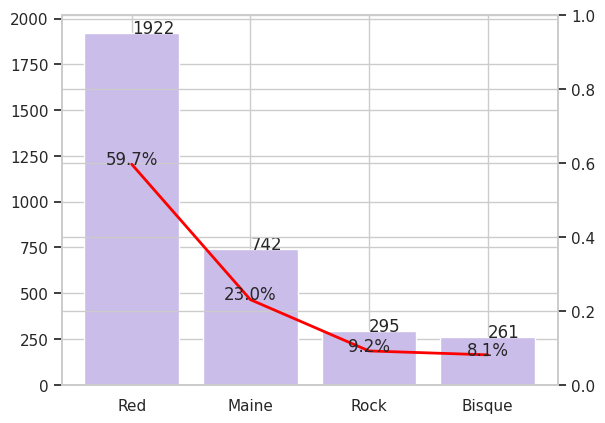




-------------------------------------------------- Year --------------------------------------------------


,FREC_ABS,FREC_REL
Year,,
2009,337,0.104658
2013,333,0.103416
2011,260,0.080745
2014,256,0.079503
2010,252,0.078261
2005,228,0.070807
2008,223,0.069255
2012,219,0.068012
2015,202,0.062733


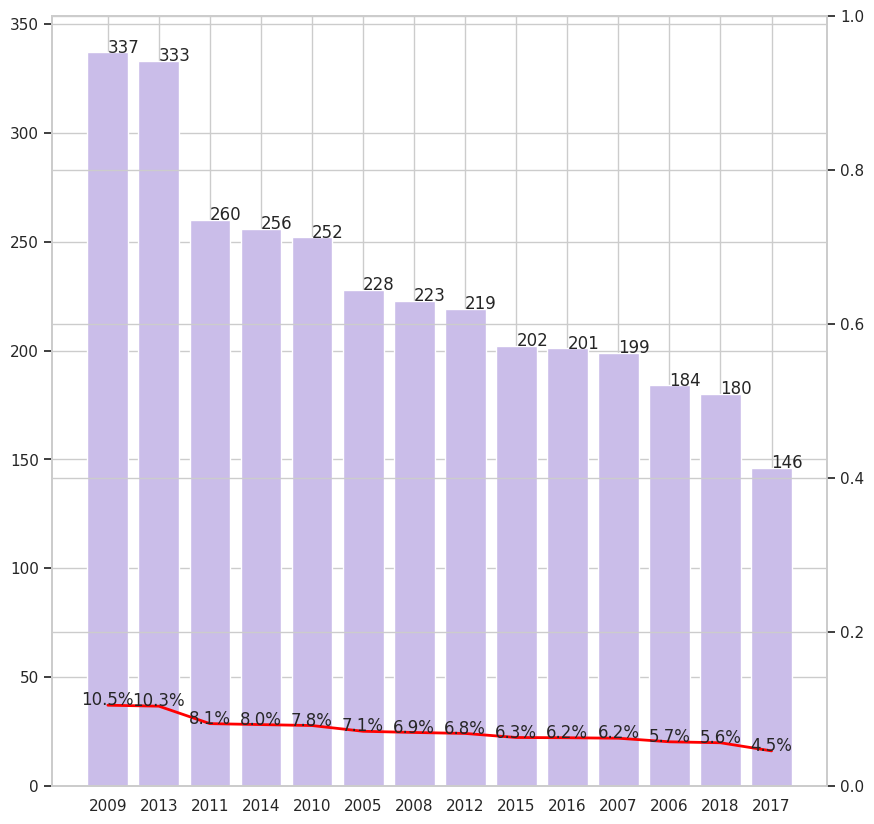




-------------------------------------------------- Month --------------------------------------------------


,FREC_ABS,FREC_REL
Month,,
10,299,0.092857
3,287,0.089130
9,284,0.088199
5,284,0.088199
1,282,0.087578
11,280,0.086957
4,274,0.085093
2,261,0.081056
6,246,0.076398


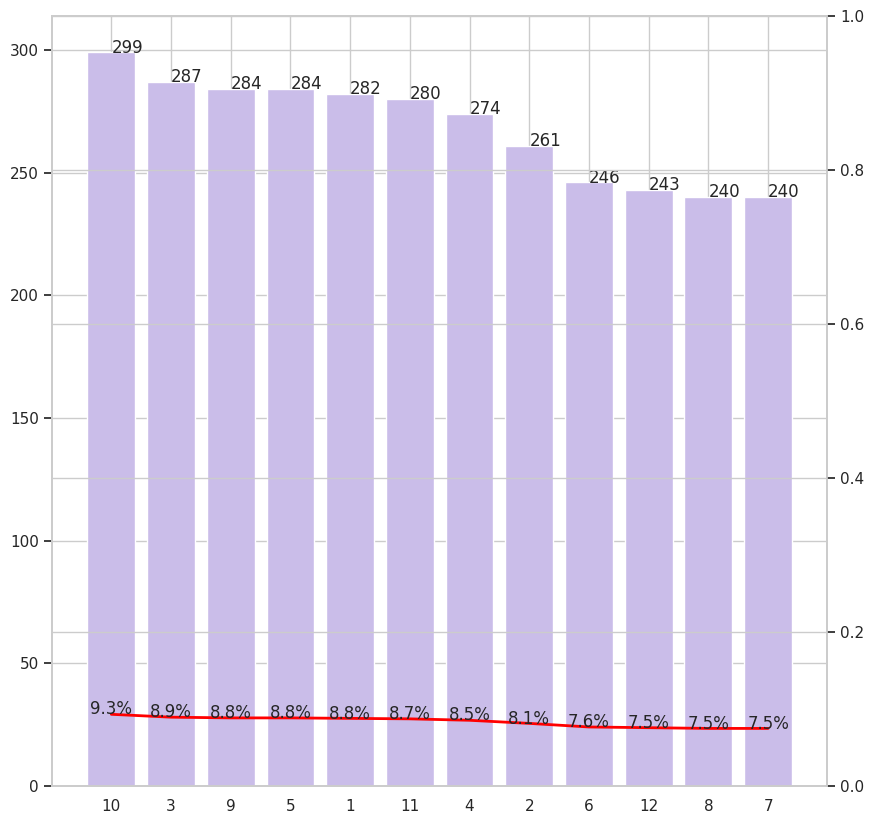

<Figure size 1000x1000 with 0 Axes>

In [143]:
#Sacamos el analisis categorico para cada variable
for categorica in varCategoricas:
    print("-"*50,categorica,"-"*50)
    analisisCategoricas(df, categorica)
    plt.figure(figsize=(10,10))
    print("\n\n")

#### **Interpretación variables categóricas:**
* Se tienen 3220 datos para pozos productores.
* La mayoría de los yacimientos son tipo Red para este dataset se tienen el  59.7% en esta modalidad y el 23% tipo Maine.
* El año en el cuál se tiene más registros es el 2009 y 2013, los meses para los cuáles más registros se reportan en este dataset son Octubre (9.3% de los datos), Marzo (8.9%) y Septiembre (8.8%).

#### Sacamos el análisis númerico para cada variable.

**Interés del box-plot** El máximo interés del box-plot es visualizar la distribución de una variable numérica de la manera más simplificada posible. Sólo utiliza los valores de los cuartiles, los extremos (el mínimo y el máximo) y valores raros o outliers.

No depende de valores ponderados como la media. Simplemente se fija en las características de la posición. En el fondo, primero ordena la variable y después la caracteriza según la posición de los cuartiles y los valores extremos.

![Baner_imagen](https://i.ibb.co/NjZMXXb/box2.png)

________________________________
**Interés del histograma** Interpretar las variaciones de los datos.
Ofrecer una mejor visión de la información proporcionada por los datos para interpretarlos más adecuadamente.

![Baner_imagen](https://i.ibb.co/wW7cP8k/histograma.jpg)

############################## Qo ##############################
                     Histograma                     


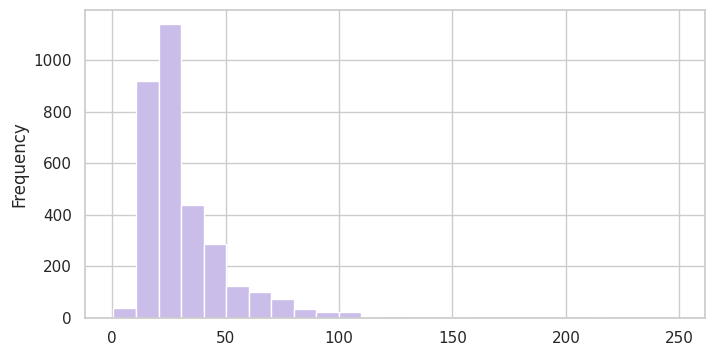



                     Boxplot                     


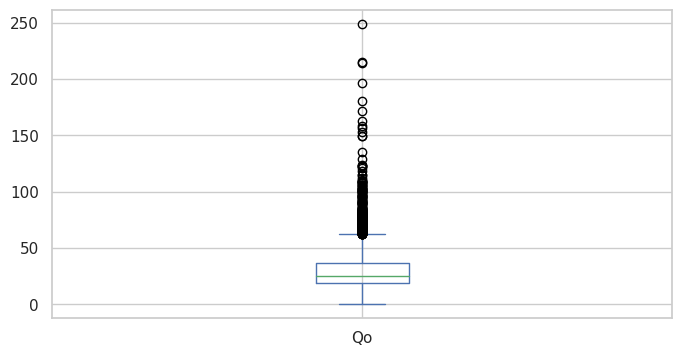




############################## Qw ##############################
                     Histograma                     


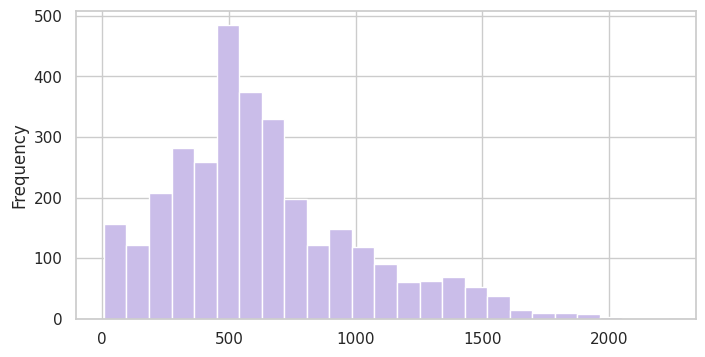



                     Boxplot                     


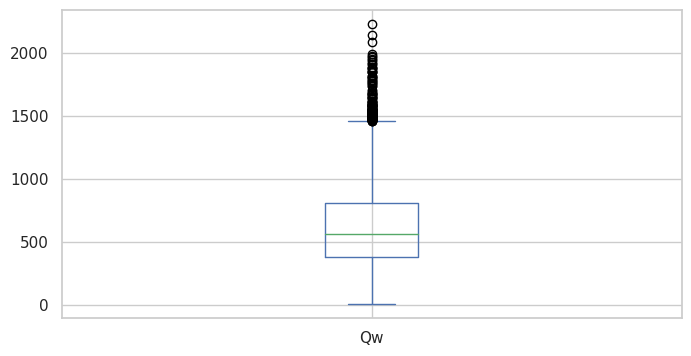




############################## CompL ##############################
                     Histograma                     


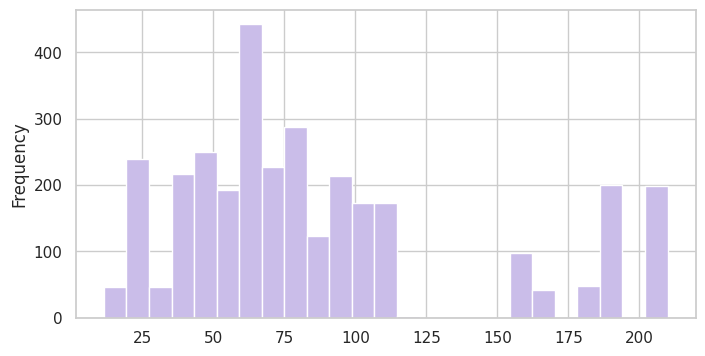



                     Boxplot                     


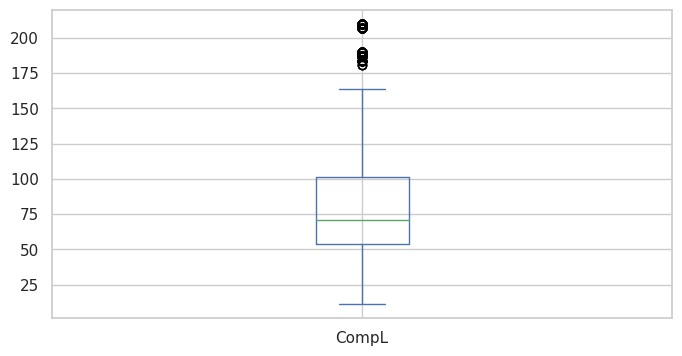




############################## FlowDays ##############################
                     Histograma                     


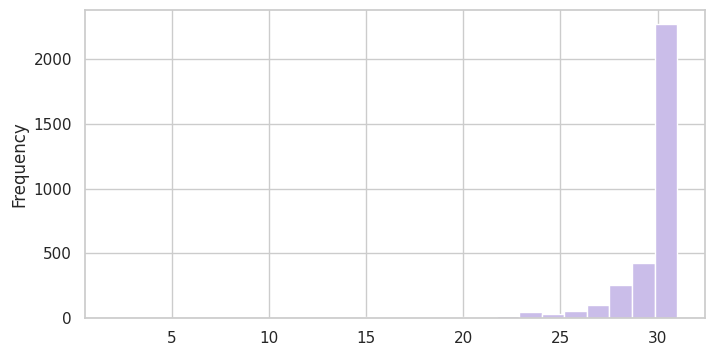



                     Boxplot                     


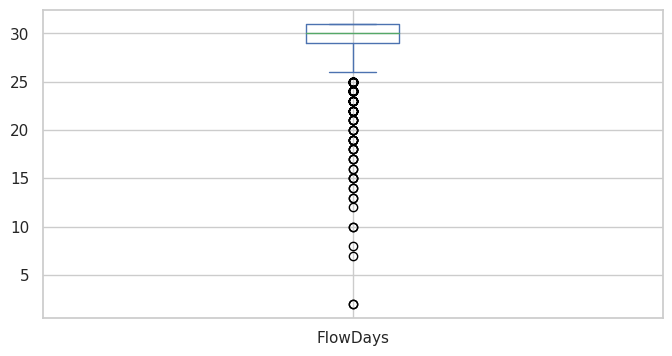




############################## TD ##############################
                     Histograma                     


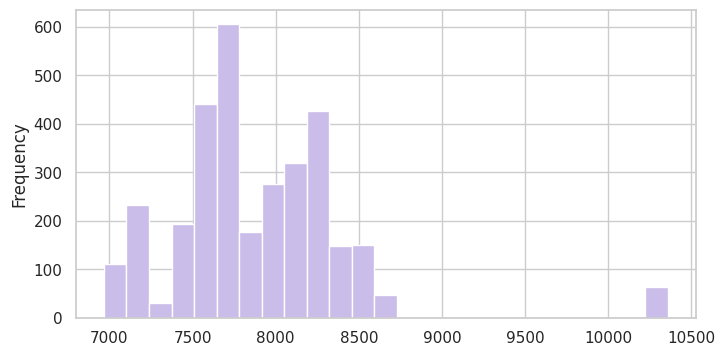



                     Boxplot                     


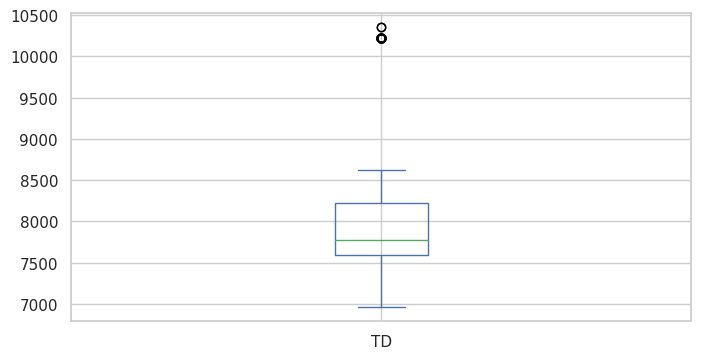

<Figure size 1000x1000 with 0 Axes>

In [144]:
for numerica in varNumericas:
  print("#"*30,numerica,"#"*30)
  analisisNumericas(df, numerica)
  plt.figure(figsize=(10,10))
  print("\n\n")

#### **Interpretación variables númericas**

**Comentario:** Del análisis de las variables numéricas se puede observar lo siguiente:
1. **Qo:** No posee una distribucion normal, posee outliers superiores.
2. **Qw:**  No posee una distribucion normal, posee outliers superiores. Histograma con islas separadas
3. **CompL:** Se observa que no sigue una distribución normal, histograma con islas separadas y posee outliers superiores.
4. **FlowDays:** No sigue una distribución normal, posee outliers inferiores.
5. **TD:**  No posee una distribucion normal, posee 2 outliers superiores.Histograma con islas separadas








### Tratamiento de Outlier y nulos en el target Qo y completamiento

En las gráficas anteriores (boxplot), vemos que entre Q1 y Q3 sabemos que están el 50% de los valores obtenidos en el estudio. A esta distancia se le llama rango intercuantílico (IQR: InterQuantile Range).

Para el tratamiento de estos outlier se decide definir una función que reciba como parámetros el conjunto de datos, el umbral inferior y el umbral superior. Y en la función se decide reemplazar por la media aquellos valores atípicos que estén por debajo del umbral inferior, y por la mediana aquellos que estén por encima del umbral superior. Cómo se muestra a continuación:



In [145]:
# ## Eliminando los outliers de Qo
#target = 'Qo'
## Eliminando los outliers del Qo
Q1_target = df[target].quantile(0.25)
Q3_target = df[target].quantile(0.75)
#se calcula el rango intercuantílico IQR
IQR_target = Q3_target - Q1_target
#Se define como valor atípico leve
#aquel que dista 1,5 veces el rango intercuantílico por debajo de Q1 o por encima de Q3
inf_target= Q1_target - 1.5 * IQR_target #vamos a calcular cual sería el umbral por abajo
sup_target= Q3_target + 1.5 * IQR_target #vamos a calcular cual sería el umbral por arriba
print('inf_target:',inf_target, 'sup_target:',sup_target)
#Quitando outlier
df=df[(df[target] >= inf_target) & (df[target] <= sup_target)]
print('Tamano despues de filtar los outliers de target: Qo',df.shape)
##Eliminando nulos
df.dropna(inplace=True)
print('Tamano despues de filtar los nulos de target',df.shape)

inf_target: -6.616308749999998 sup_target: 62.48758125
Tamano despues de filtar los outliers de target: Qo (2958, 15)
Tamano despues de filtar los nulos de target (2958, 15)


<ipython-input-145-85991eb72b4a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [146]:
CompL ='CompL' #declarando la variable
# ## Eliminando los outliers de CompL
Q1_CompL = df[CompL].quantile(0.25)
Q3_CompL  = df[CompL].quantile(0.75)
#se calcula el rango intercuantílico IQR
IQR_CompL  = Q3_CompL - Q1_CompL
#Se define como valor atípico leve
#aquel que dista 1,5 veces el rango intercuantílico por debajo de Q1 o por encima de Q3
inf_CompL = Q1_CompL  - 1.5 * IQR_CompL  #vamos a calcular cual sería el umbral por abajo
sup_CompL = Q3_CompL  + 1.5 * IQR_CompL  #vamos a calcular cual sería el umbral por arriba

print('inf_CompL :',inf_CompL , 'sup_CompL :',sup_CompL )
#Quitando outlier
df=df[(df[CompL] >= inf_CompL) & (df[CompL] <= sup_CompL)]
print('Tamano despues de filtar los outliers de CompL',df.shape)

##Eliminando nulos
df.dropna(inplace=True)
print('Tamano despues de filtar los nulos de CompL',df.shape)

inf_CompL : -25.426509999999993 sup_CompL : 177.98557
Tamano despues de filtar los outliers de CompL (2576, 15)
Tamano despues de filtar los nulos de CompL (2576, 15)


### Correlacción de variables con respecto a Qo, Qw

In [147]:
# Eliminamos columnas que no nos aportan información relevante para la correlación
df = df.drop(['BHP'], axis=1)
df = df.drop(['lat'], axis=1)
df = df.drop(['long'], axis=1)
df= df.drop(['wellAPI'], axis=1)


In [148]:
df['Year'] = pd.to_numeric(df['Year'])

<ipython-input-149-2175ba64966b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Qg', y='reservoir', inner='box', palette='Dark2')


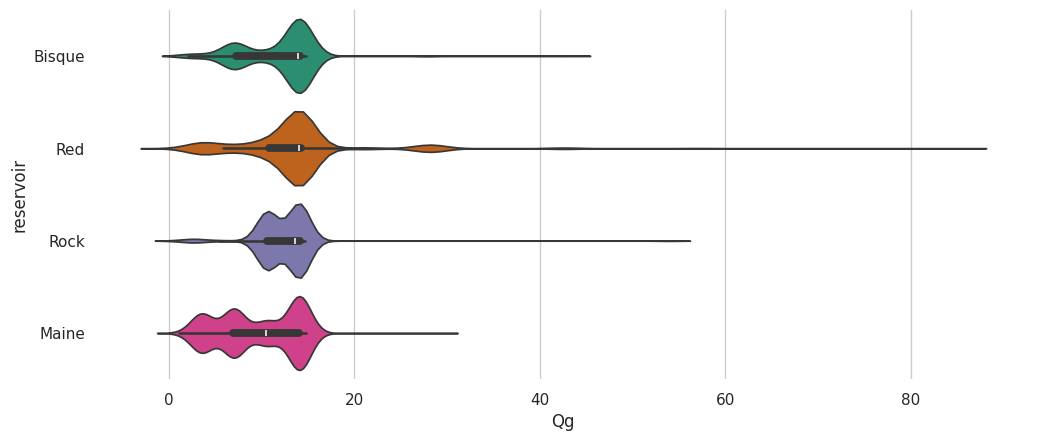

In [149]:
figsize = (12, 1.2 * len(df['reservoir'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Qg', y='reservoir', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

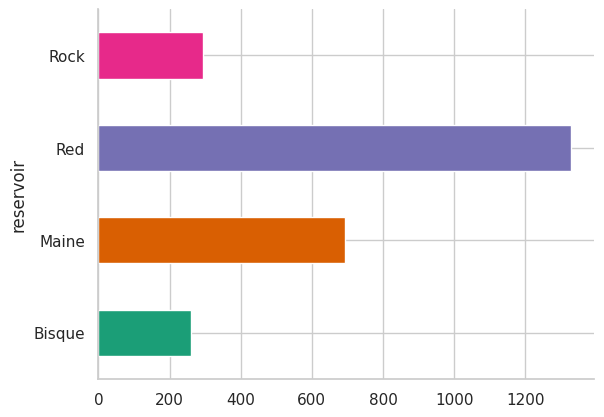

In [150]:
df.groupby('reservoir').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'Qw'}, xlabel='reservoir'>

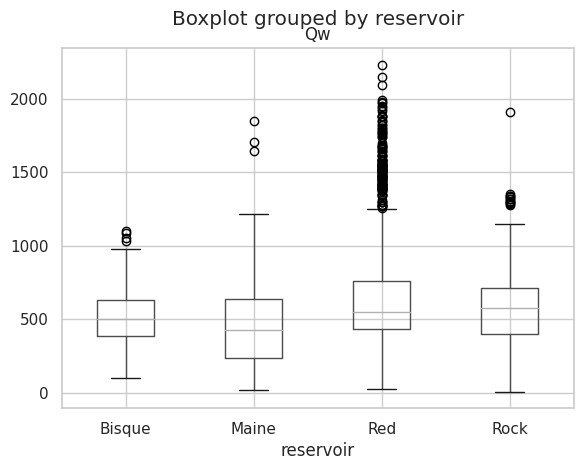

In [151]:
df.boxplot(column='Qw', by='reservoir')

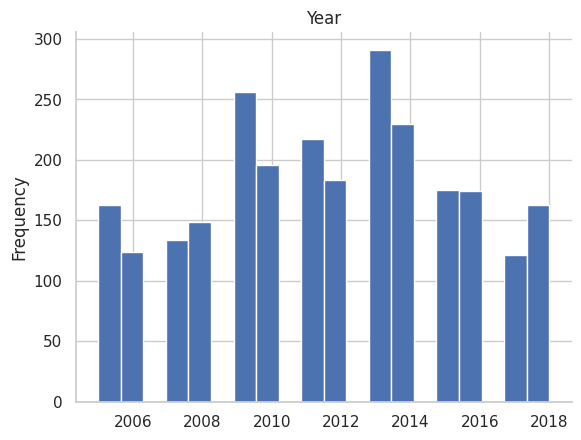

In [152]:
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Veamos gráficamente cómo se comportan estas variables más influyentes con respecto a la tasa de producción de petróleo y agua.**

### Comportamiento de la tasa de producción de petróleo con respecto a la tasa de producción de agua.

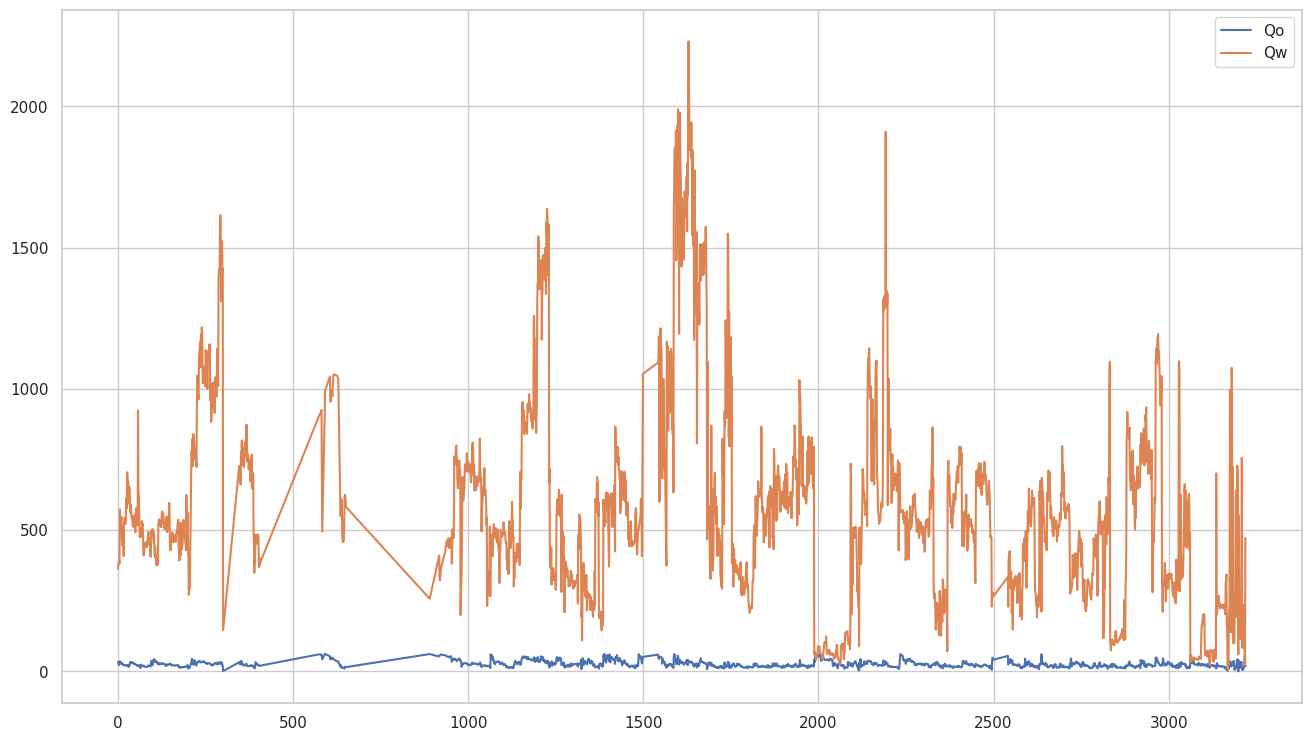

In [156]:
df[['Qo','Qw']].plot(figsize=(16,9))
plt.show()

### Comportamiento de la tasa de producción con respecto al completamiento.

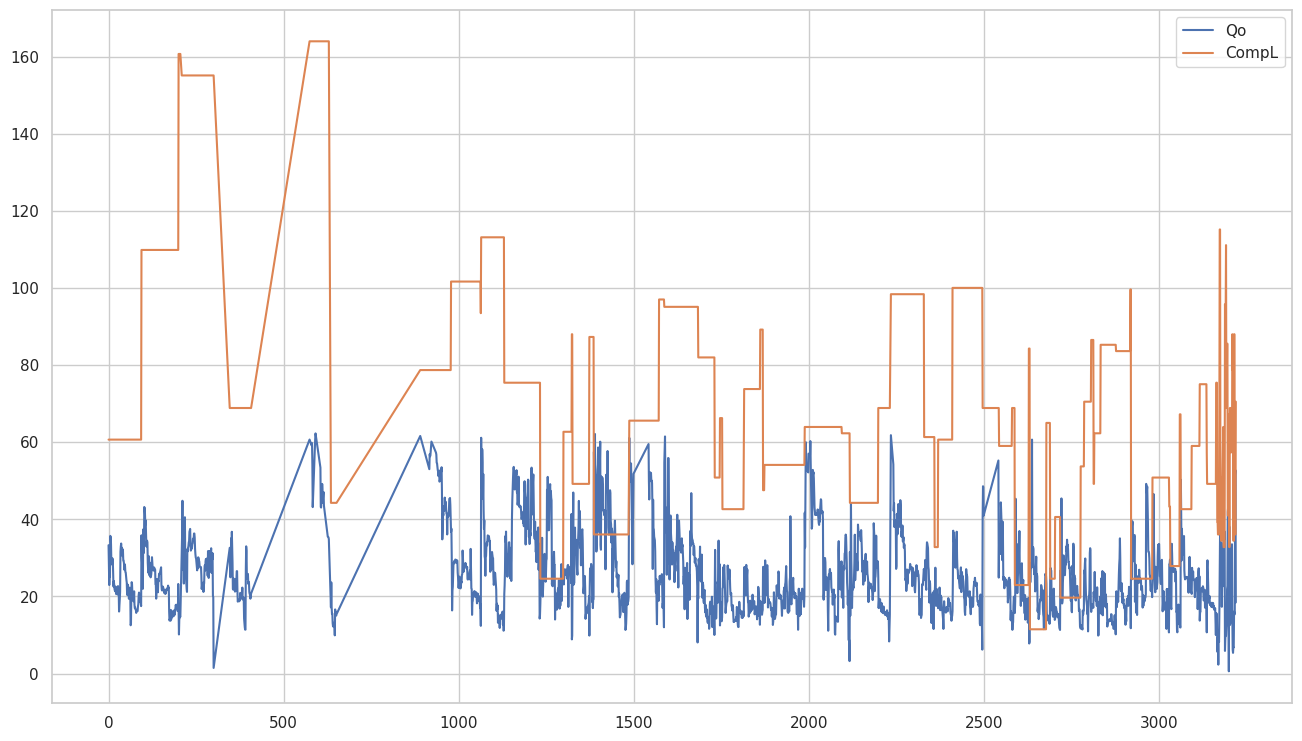

In [157]:
df[['Qo','CompL']].plot(figsize=(16,9))
plt.show()

### Completamiento vs. tasa de producción de petróleo.

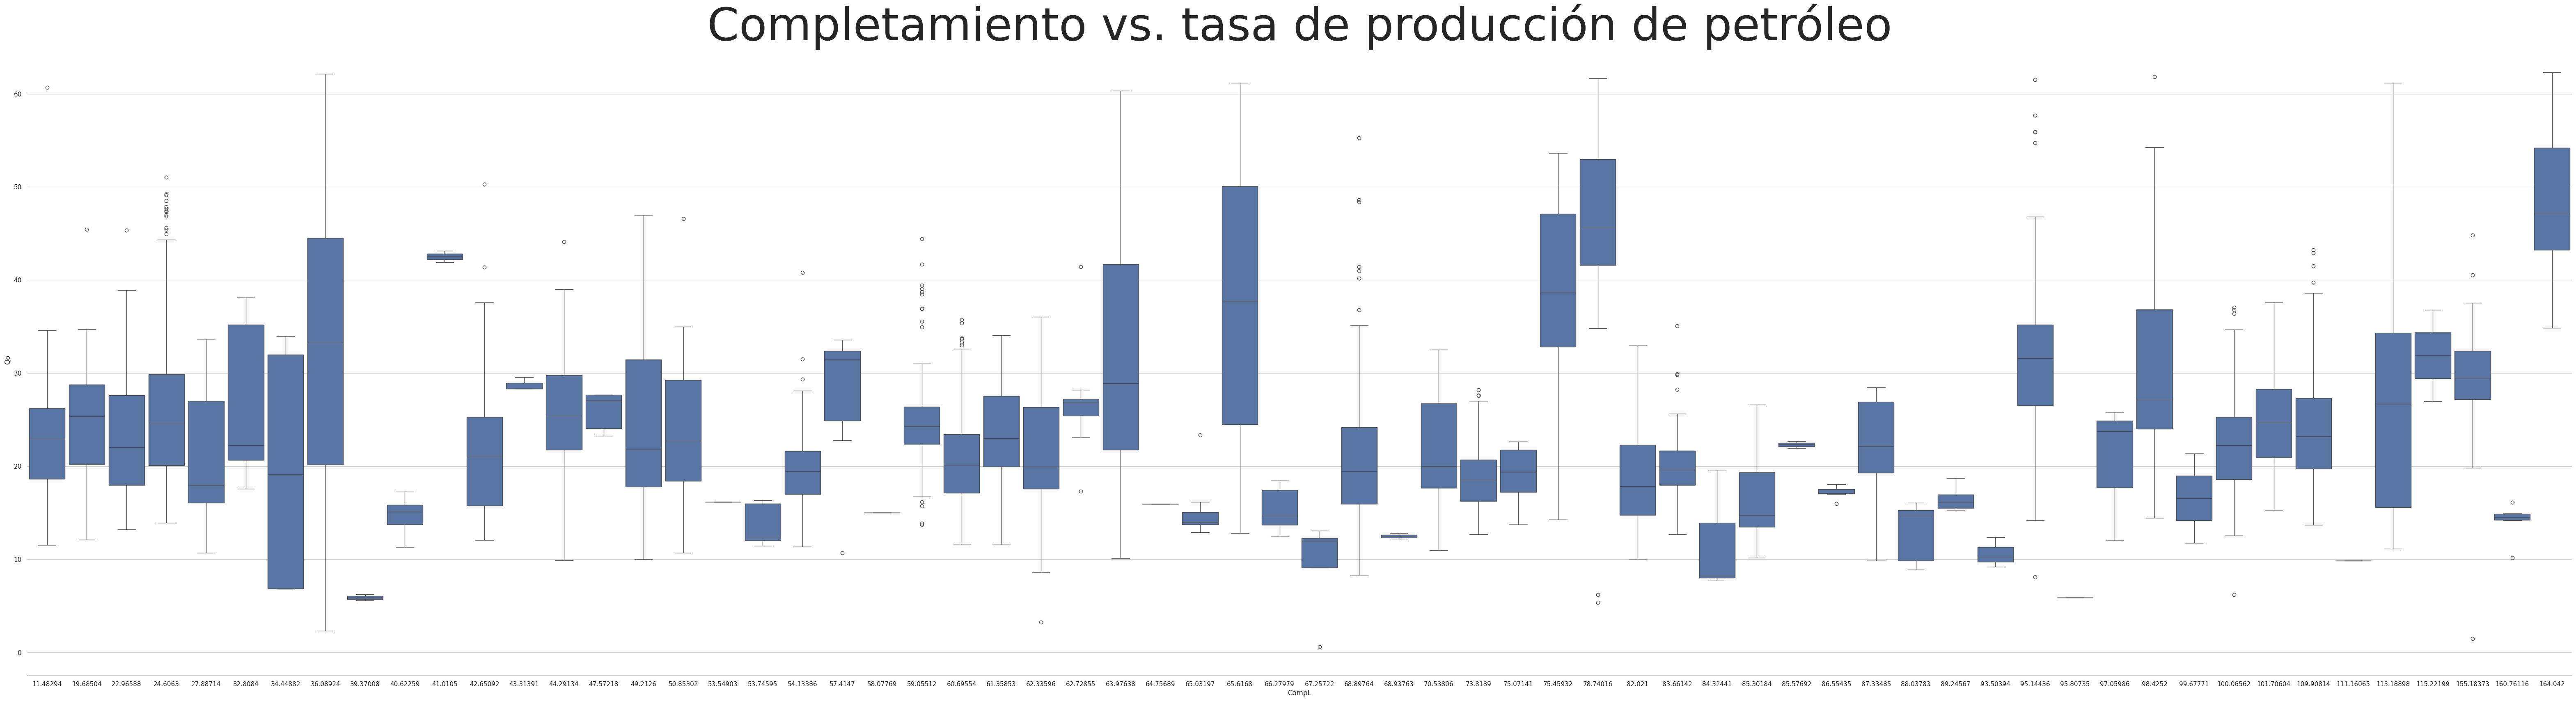

In [168]:
g= sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(80,20))
sns.boxplot(x=df.CompL,y=df.Qo, width=.9)
plt.title("Completamiento vs. tasa de producción de petróleo", fontsize=80)
#plt.ylim(0, 2)  # limitar y, para que los 'outliers' no ocupan la mayoría del espacio
sns.despine(top=True,
            right=True,
            left=True,
            bottom=False)

**¿Cuál es el completamiento que dá tasas más altas de producción de petróleo?**

El completamiento que dá tasas más altas de producción de petróleo es el de 36,08924 (ft), su caja naranja se ve más arriba que los demás y observa que este alcanza tasas de produccion de petróleo máximas de hasta 62 (bbl/d).


**¿Cuál es el completamiento que dá tasas más bajas de producción de petróleo?**

El completamiento que dá tasas más bajas de producción es el de 95.14436 (ft)su caja es prácticamente una línea se ve más abajo que los demás y observa que este alcanza tasas de producción mínimas de hasta 9 (bbl/d); esto puede deberse a otros factor (valores atípicos, etc) que se sugiere explorar detenidamente para contrastar la información de manera adecuada.


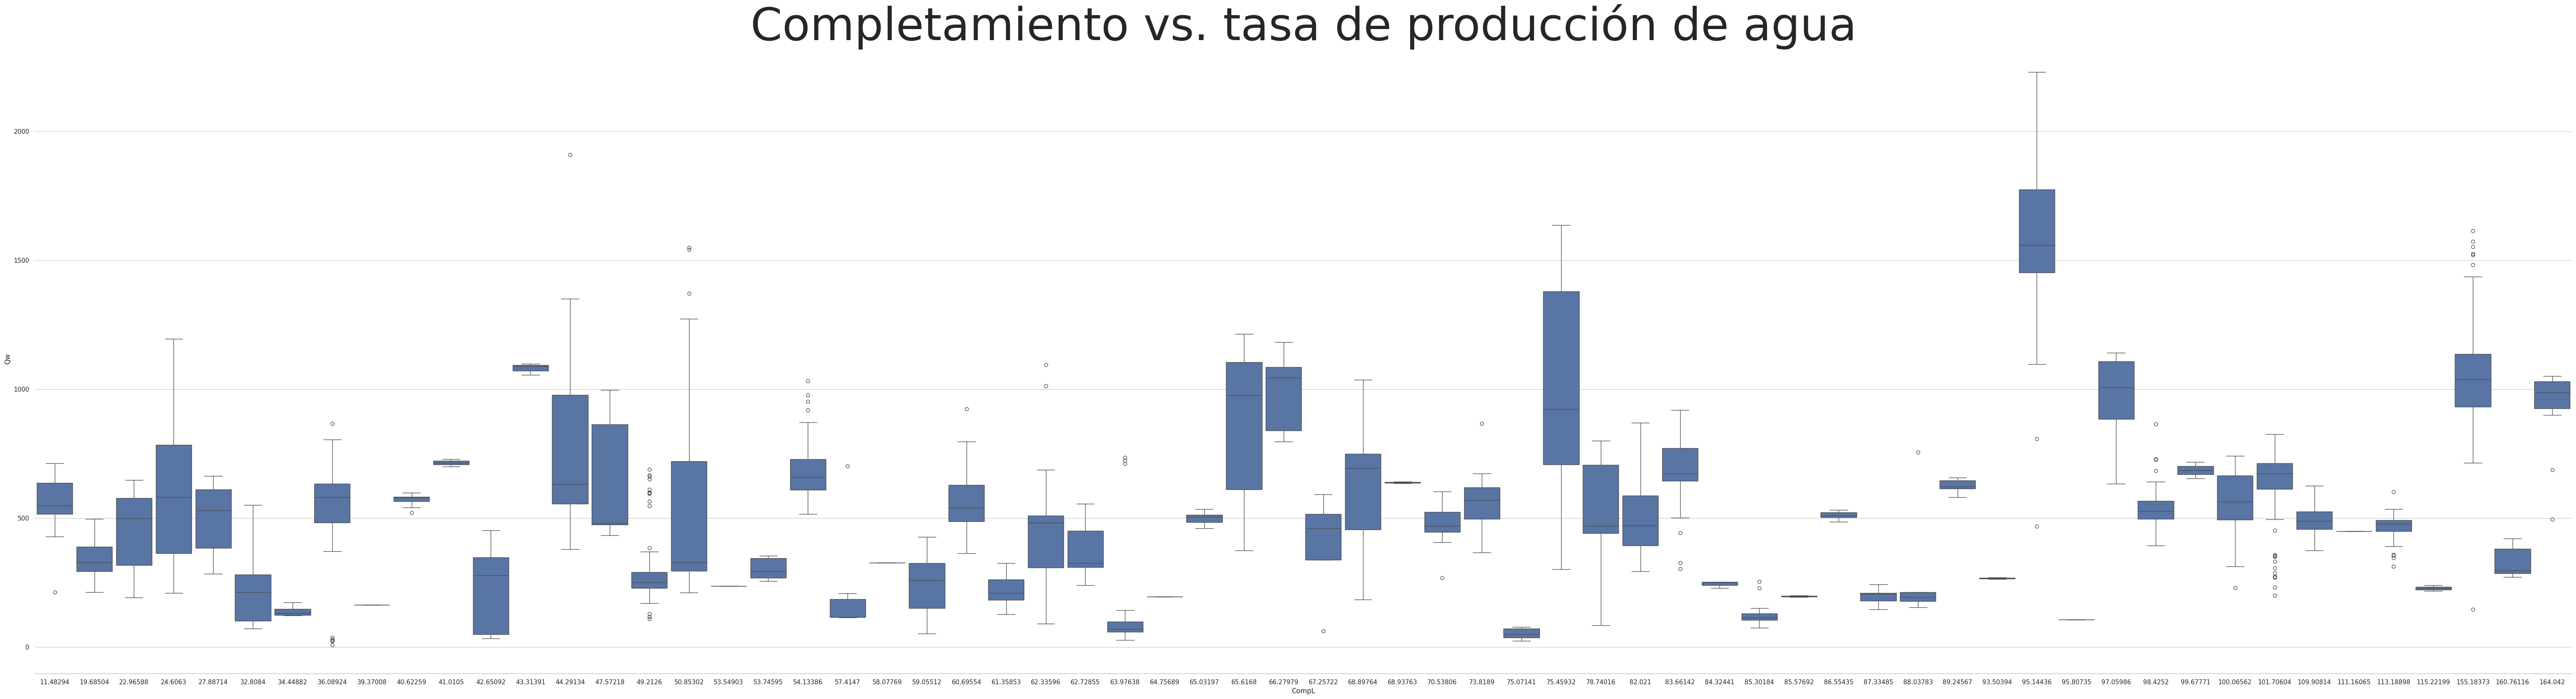

In [169]:
g= sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(80,20))
sns.boxplot(x=df.CompL,y=df.Qw, width=.9)
plt.title("Completamiento vs. tasa de producción de agua", fontsize=80)
#plt.ylim(0, 2)  # limitar y, para que los 'outliers' no ocupan la mayoría del espacio
sns.despine(top=True,
            right=True,
            left=True,
            bottom=False)

**¿Cuál es el completamiento que dá tasas más altas de producción de agua?**

El completamiento que dá tasas más altas de producción de agua es el de 95,80735 (ft), su caja morada se vé más arriba que los demás y observa que este alcanza tasas de producción de agua máximas de hasta 2000 (bbl/d). Esto justifica que su producción de petróleo sea la mínima). Revisar si se conecta con formaciones de agua (acuífero) cercanas.

**¿Cuál es el completamiento que dá tasas más bajas de producción de agua?**
El completamiento que dá tasas más bajas de producción de agua es el de 75,07141 (ft), su caja azul agua marina se vé más abajo que los demás y se observa que este alcanza tasas de producción de agua mínimas de hasta 10 (bbl/d).
